In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [146]:
# load the dataset
df = pd.read_csv("Twitter Sentiments.csv")
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [147]:
df.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [149]:
# preprocessing the dataset

def remove_pattern(input_txt, pattern): 
    # it would remove the corresponding pattern like @, # in input text
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [150]:
# remove twitter handles (@user)
df['Clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [151]:
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [152]:
# remove special characters, numbers and punctuations

df['Clean_tweet'] = df['Clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [153]:
# remove short words
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
# if the word length is greater than 3 then it would iterate through the sentences of clean tweet
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [154]:
# individual words considered as tokens
tokenized_tweet = df['Clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Clean_tweet, dtype: object

In [155]:
# stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Clean_tweet, dtype: object

In [156]:
# combining words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['Clean_tweet'] = tokenized_tweet
df.head()

,id,label,tweet,Clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


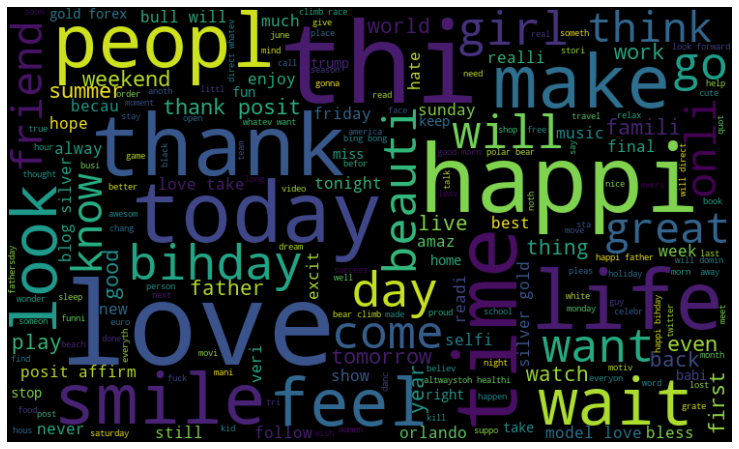

In [157]:
#EDA part
# visualize the frequent words

all_words = " ".join([sentence for sentence in df['Clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width= 750, height=450, random_state=45, max_font_size=120).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

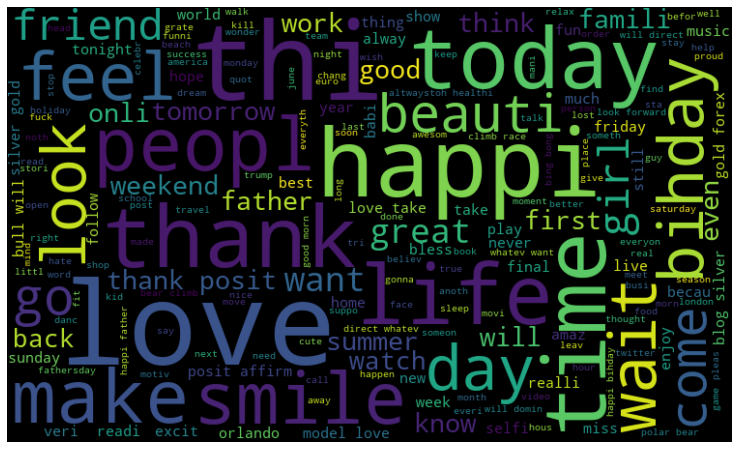

In [158]:
# frequent words visualization for +ve tweets


all_words = " ".join([sentence for sentence in df['Clean_tweet'][df['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width= 750, height=450, random_state=45, max_font_size=120).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

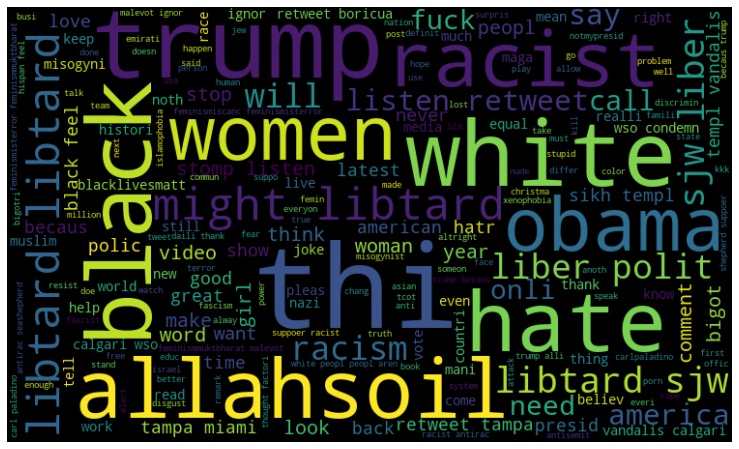

In [159]:
# frequent words visualization for -ve tweets


all_words = " ".join([sentence for sentence in df['Clean_tweet'][df['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width= 750, height=450, random_state=45, max_font_size=120).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [160]:
# extracting the hashtag
def hash_tag_extract(tweets):
    hashtags = []
    # loop words in the tweet 
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
        
    return hashtags

In [161]:
# extract hashtags from non racist/sexist tweets 
ht_positive = hash_tag_extract(df['Clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets 
ht_negative = hash_tag_extract(df['Clean_tweet'][df['label']==1])

In [162]:
ht_positive[0:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [163]:
# unnest list

ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [164]:
ht_positive[0:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [165]:
ht_negative[:5]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay']

In [166]:
freq = nltk.FreqDist(ht_positive)
data_p = pd.DataFrame({'Hashtag': list(freq.keys()), 
                    'Count': list(freq.values())})
data_p.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


In [167]:
freq = nltk.FreqDist(ht_negative)
data_n = pd.DataFrame({'Hashtag': list(freq.keys()), 
                    'Count': list(freq.values())})
data_n.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


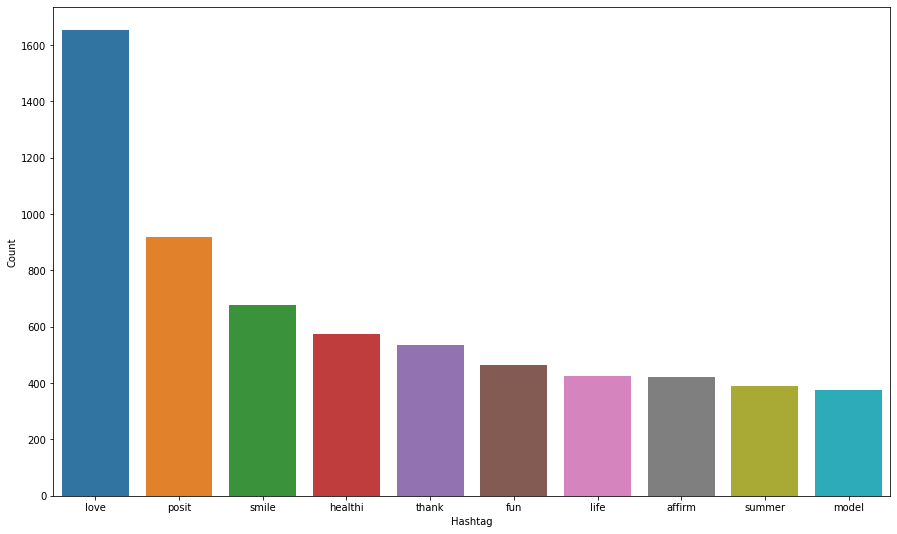

In [168]:
# select top 10 hashtags in positive tweets

data_p = data_p.nlargest(columns='Count', n=10)
plt.figure(figsize=(15, 9))
sns.barplot(data= data_p, x="Hashtag", y="Count")
plt.show()

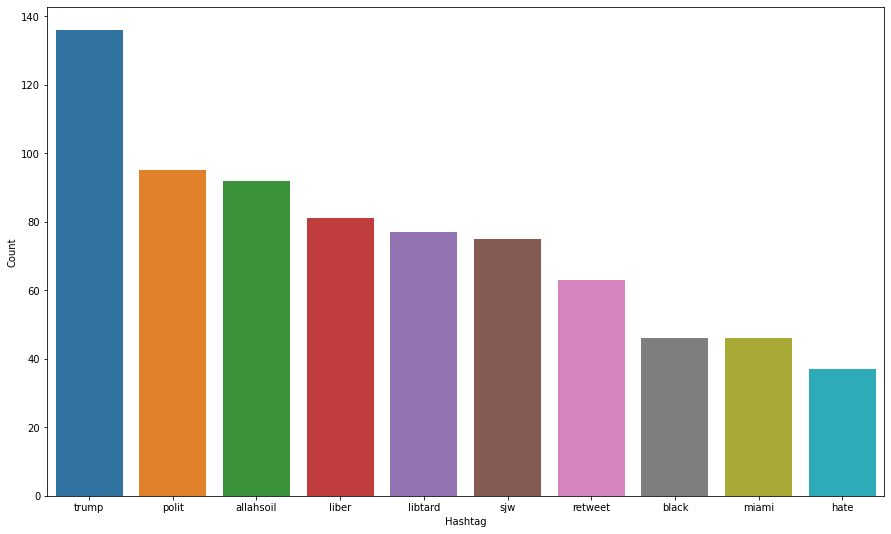

In [169]:
# select top 10 hashtags in negative tweets

data_n = data_n.nlargest(columns='Count', n=10)
plt.figure(figsize=(15, 9))
sns.barplot(data= data_n, x="Hashtag", y="Count")
plt.show()

In [170]:
# input split

from sklearn.feature_extraction.text import CountVectorizer # this would generate a bag of words
bow_vectorizer = CountVectorizer(max_df= 0.90, min_df = 2, max_features= 1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Clean_tweet'])

In [171]:
# bow.toarray()

In [172]:
# split the input
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)

In [173]:
## model training

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [174]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)

LogisticRegression()

In [175]:
# testing 
pred = model_LR.predict(X_test)
f1_score(Y_test, pred)

0.49763033175355453

In [176]:
accuracy_score(Y_test, pred)

0.9469403078463271

In [177]:
# use probability to get output
pred_prob = model_LR.predict_proba(X_test)
pred = pred_prob[:, 1] >= 0.3  # greater tha equal to 30 percent
# [:, 1] means taking all rows and 1st column
pred = pred.astype(np.int)

f1_score(Y_test, pred)

0.5545722713864307

In [178]:
## Trying another way
from sklearn.metrics import f1_score, classification_report

## Linear Regression Model

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
model_LR = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
model_LR.fit(X_train, Y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [181]:
# testing 

pred = model_LR.predict(X_test)
print("F1-Score - ", f1_score(Y_test, pred))
print()
print(classification_report(Y_test, pred))

F1-Score -  0.5029103608847496

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7432
           1       0.72      0.39      0.50       559

    accuracy                           0.95      7991
   macro avg       0.84      0.69      0.74      7991
weighted avg       0.94      0.95      0.94      7991



## Linear SVM model

In [182]:
from sklearn.svm import LinearSVC

In [183]:
model_svc = LinearSVC(loss='hinge', max_iter=1000)
model_svc.fit(X_train, Y_train)

LinearSVC(loss='hinge')

In [184]:
pred = model_svc.predict(X_test)
print("F1-Score - ", f1_score(Y_test, pred))
print()
print(classification_report(Y_test, pred))

F1-Score -  0.4994054696789536

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.74      0.38      0.50       559

    accuracy                           0.95      7991
   macro avg       0.85      0.68      0.74      7991
weighted avg       0.94      0.95      0.94      7991



## BernoulliNB

In [185]:
from sklearn.naive_bayes import BernoulliNB

In [186]:
model_BNB = BernoulliNB(alpha=2)
model_BNB.fit(X_train, Y_train)

BernoulliNB(alpha=2)

In [187]:
pred = model_BNB.predict(X_test)
print("F1-Score - ", f1_score(Y_test, pred))
print()
print(classification_report(Y_test, pred))

F1-Score -  0.5198889916743755

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7432
           1       0.54      0.50      0.52       559

    accuracy                           0.94      7991
   macro avg       0.75      0.74      0.74      7991
weighted avg       0.93      0.94      0.93      7991



## Naive Bayes Model

In [188]:
from sklearn.naive_bayes import MultinomialNB

In [189]:
model_MNB = MultinomialNB(alpha=1)
model_MNB.fit(X_train, Y_train)

MultinomialNB(alpha=1)

In [190]:
pred = model_MNB.predict(X_test)
print("F1-Score - ", f1_score(Y_test, pred))
print()
print(classification_report(Y_test, pred))

F1-Score -  0.5344202898550724

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7432
           1       0.54      0.53      0.53       559

    accuracy                           0.94      7991
   macro avg       0.75      0.75      0.75      7991
weighted avg       0.93      0.94      0.94      7991



## Gradient Boosting Classifier

In [191]:
from sklearn.ensemble import GradientBoostingClassifier

In [192]:
model_GBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100)
model_GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

In [193]:
pred = model_GBC.predict(X_test)
print("F1-Score - ", f1_score(Y_test, pred))
print()
print(classification_report(Y_test, pred))

F1-Score -  0.4172274562584118

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7432
           1       0.84      0.28      0.42       559

    accuracy                           0.95      7991
   macro avg       0.90      0.64      0.69      7991
weighted avg       0.94      0.95      0.93      7991



## Catboost

In [194]:
from catboost import CatBoostClassifier

In [195]:
# model_catboost = CatBoostClassifier(cat_features = None, eval_metric = (X_test, Y_test))
# model_catboost.fit(X_train, Y_train)